In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from math import sqrt 
from math import floor
from math import ceil
from math import exp 
import pickle
from operator import itemgetter
import time
from datetime import timedelta


In [2]:
def filter_conformations(saws ): 
    """Функция получает на вход список блужданий на плоскости, в котором каждое блуждание представлено списком из координат - кортежом.
    Осуществляет перебор списка. Вызывает функцию distance_between_saws.
    Возвращает список блужданий без повторения конформаций."""
    result = []
    result.append(saws[0])
    #result = [saws[0]]
    for i in range (1, len(saws)):
        if(i%100==0):
            print(i, end= " ")
        k=0
        for conformation in result:
            if(  distance_between_saws(conformation, saws[i] )== 0):
                k=-1
                break;
        if(k==-1):
            continue
        else:
            #if(saws[i])
            result.append(saws[i])
    return result 

In [3]:
def vector_for_distance(saw):
    """Принимает на вход конформацию(блуждание) на плоскости - список координат(кортежей).
    Возвращает вектор, описывающий данную конформацию, согласно [1]"""
    result = []
    left = [[(0,1), (-1, 0)] , [(1, 0), (0, 1)], [(0, -1), (1, 0)], [(-1, 0), (0, -1)] ]
    right = [ [(1, 0), (0, -1)], [(0,1), (1, 0)],  [(-1, 0), (0, 1)],  [(0, -1), (-1, 0)]  ]
    for i in range(2, len(saw)):
        steps = []
        dx = saw[i-1][0] - saw[i-2][0]
        dy =  saw[i-1][1] - saw[i-2][1]
        steps.append((dx, dy))
        dx = saw[i][0] - saw[i-1][0]
        dy =  saw[i][1] - saw[i-1][1]
        steps.append((dx, dy))
        if(saw[i][0] == saw[i-1][0] and saw[i-1][0]==saw[i-2][0] or saw[i][1] == saw[i-1][1] and saw[i-1][1]==saw[i-2][1]):
            result.append(0)
        elif (steps in left):
            result.append(-1)
        else:
            result.append(1)
    return result 

In [4]:
def distance_between_saws(saw1, saw2):
    """Принимает на вход два блуждания(конформации) на плоскости и возвращает целое число - расстояние между ними согласно метрике, описанной в [1].
    Вызывает функцию vector_for_distance для каждого переданного блуждания"""
    v1 = 0
    v2 = 0
    v_minus = []
    v_plus = [] 
    s1 =  vector_for_distance(saw1)
    s2= vector_for_distance(saw2)
    for i in range(len(s1)):
        v1=v1+ abs( s1[i]-s2[i])
        v2=v2+ abs( s1[i]+s2[i])
    #print(saw1, " ", s1)
    #print(saw2, " ", s2)
    #print(min(v1, v2))
    return min(v1, v2)

In [5]:
steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
def get_all_conformations(length):
    """Создает список конформаций на плоскости.  Функция принимает один аргумент - длину (число остатков).
    Возвращает список блужданий, в котором каждое блуждание представлено списком из координат
    Данный вариант работает для длин равных или больше 3."""
    #if(length==3):
        #return [[(0, 0), (1, 0), (2, 0)], [(0, 0), (1, 0), (1, 1)]]
    if(length==2):
        return [[(0, 0), (1, 0)], ]
    else:
        result = get_all_conformations(length-1)
        new_conformations = [] 
        for i in range(len(result)):
            #print(i, end = "\n")
            for step in steps:
                new_point = (result[i][-1][0]+step[0], result[i][-1][1]+step[1] )
                if new_point in result[i]:
                    #print("the same ", new_point)
                    continue
                temp = result[i].copy()
                temp.append(new_point)
                new_conformations.append(temp)
        #print(length, " new  result is  ", new_conformations )
    filtered = filter_conformations(new_conformations)
    #print("after filter ", filtered)
    return filtered

In [6]:
start_time = time.monotonic()

conformations_10= get_all_conformations(10)

end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))
#print(conformations_10)
print(len(conformations_10))

start_conformation = [(0,0)]
saws_set =[]
print('all')
get_all_saws(saws_set, 6,start_conformation)
print(len(saws_set))
#print(saws_set)

#for i in range(len(saws_set)):
#    for j in conformations_10:
#        if j==saws_set[i]:
#            print(i)


#3 0 and 1
#

100 200 100 200 300 400 500 600 700 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 0:00:43.950078
2034
all


NameError: name 'get_all_saws' is not defined

Для длины 10 получается 2034 конформации. Точно такой же результат описан в [1]

In [20]:
13*8-4

100

In [7]:
with open('out_10.pickle', 'wb') as f:
    pickle.dump(conformations_10, f)

In [7]:
number_of_conformations=[]
for i in range(3, 11):
    c = get_all_conformations(i)
    number_of_conformations.append(len(c))
    print(i, " finished", end = " ")

3  finished 4  finished 5  finished 6  finished 7  finished 100 200 8  finished 100 200 100 200 300 400 500 600 700 9  finished 100 200 100 200 300 400 500 600 700 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 10  finished 

In [10]:
approximate = []
two =[]
for i in range(3, 11):
    approximate.append(2.718**(i-1))
    two.append(2**i)

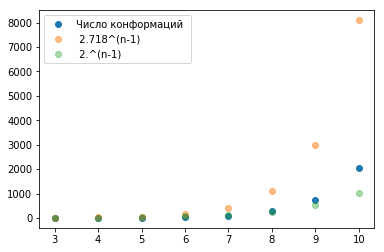

In [11]:
plt.plot(range(3, 11), number_of_conformations, 'o', label = "Число конформаций ")
plt.plot(range(3, 11), approximate, 'o', label = " 2.718^(n-1) ", alpha = 0.5)
plt.plot(range(3, 11), two, 'o', label = " 2.^(n-1) ", alpha=0.4)
plt.legend(loc='best')

Число конформаций (блужданий без самопересечений) растет экспоненциально. Это также показывается во второй главе [2]

In [12]:
def end_to_end_distance(path):
    """Евклидова метрика"""
    distance = sqrt((path[-1][0]-path[0][0])**2+(path[-1][1]-path[0][1])**2)     
    return distance 

In [13]:
def end_to_end_vector(vector1, vector2):
    "Просто вектор, сосединяющий начало и конец "
    return( vector2[0]-vector1[0], vector2[1]-vector1[1])

In [14]:
steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
def calculate_contacts(saw):
    """Функция принимает на вход конформацию на плоскости(список координат). 
    Возвращает число топологических соседей для нее """
    k=0
    for i in range(1, len(saw)-1):
        not_topological=[saw[i-1], saw[i+1]]
        for step in steps:
            new_point = (saw[i][0]+step[0], saw[i][1]+step[1] )
            if (new_point in saw and (new_point not in not_topological)):
                k=k+1
    for step in steps:
        new_point_begin = (saw[0][0]+step[0], saw[0][1]+step[1] )
        new_point_end= ( saw[-1][0]+step[0], saw[-1][1]+step[1])
        if(new_point_begin in saw and new_point_begin!=saw[1]):
            k=k+1
 
        if( new_point_end in saw and new_point_end!=saw[-2]    ):
            k=k+1
        
        
    return k//2
        

In [15]:
e=22
conformations_10[e]

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (5, 1),
 (4, 1),
 (3, 1),
 (3, 2)]

In [10]:
calculate_contacts(conformations_10[e])

2

In [16]:
def count_saws_contact(saws):
    """Функция принимает список блужданий на плоскости. Возвращает словарь, в котором ключ - число топологических соседей,
    а значение - число таких конформаций.
    Максимальное число топологических соседей находится по формуле из [1]"""
    n=len(saws[0])
    m_1 = ceil(sqrt(n))
    m = floor(sqrt(n))
    if( n>m*m and m*m_1>=n ):
        t_max =n+1 - (4*m+2)/2
    elif (n>m*m_1 and n<=m_1*m_1):
        t_max = n+1 - (4*m+4)/2
    else:
        t_max =  n+1 - (4*m)/2
    
    t_max=int(t_max)
    print(t_max)
    counts ={}
    for i in range(t_max+1):
        counts.update({i :0})
    for saw in saws:
        e=calculate_contacts(saw)
        counts[e]=counts[e]+1
    return counts

In [17]:
d = count_saws_contact(conformations_10)
print(d)

4
{0: 666, 1: 672, 2: 425, 3: 173, 4: 98}


666 + 672 + 425 + 173 + 98 = 2034

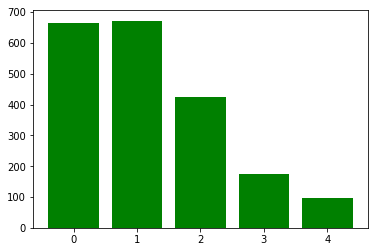

In [17]:
plt.bar(list(d.keys()), d.values(), color='g')
plt.show()

Гистограмма показывает, сколько существует различных конформаций для данного числа топологических соседей. 
Я сравнила эту гистаграмма с гистограммой из статьи (там она показана для последовательности из H), все нормально 

In [11]:
def get_sequences(length):
    """Получаем все последовательности заданной длины, состоящие из 0 и 1.
    1 - это H
    0 - это Р"""
    if(length ==1):
        return [[0], [1]]
    else:
        previous = get_sequences(length - 1)
        result = [] 
        for i in range(len(previous)):
            current = previous[i].copy()
            current.append(0)
            result.append(current.copy())
            current[-1] = 1
            result.append(current)
            #print(result) 
        return result


In [18]:
class Protein(object):
    def __init__(self, sequence, conformation):
        self.sequence = sequence
        self.conformation = conformation
        
    def count_proteins_contacts(self):
        """Для данного белка считает число топологических контактов HH и контакты HP/PP.
        Возвращает кортеж из двух элементов: первый элемент - число контактов НН, второй элемент - остальные контакты."""
        hh=0
        hp_pp = 0
        steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
        for i in range(1, len(self.conformation)-1):
            not_topological=[self.conformation [i-1], self.conformation[i+1]]
            for step in steps:
                new_point = (self.conformation[i][0]+step[0], self.conformation [i][1]+step[1] )
                if (new_point in self.conformation  and (new_point not in not_topological)):
                    position = self.conformation.index(new_point)
                    if( self.sequence[position]==1 and self.sequence[i]==1 ):
                        hh=hh+1
                    else:
                        hp_pp=hp_pp + 1 
        for step in steps:
            new_point_begin = (self.conformation[0][0]+step[0], self.conformation[0][1]+step[1] )
            new_point_end= ( self.conformation[-1][0]+step[0], self.conformation [-1][1]+step[1])
            if(new_point_begin in self.conformation  and new_point_begin!=self.conformation [1]):
                position = self.conformation.index(new_point_begin)
                if( self.sequence[position]==1 and self.sequence[0]==1 ):
                    hh=hh+1
                else:
                    hp_pp=hp_pp + 1 
            if( new_point_end in self.conformation  and new_point_end!=self.conformation[-2]):
                position = self.conformation.index(new_point_end) 
                if( self.sequence[position]==1 and self.sequence[-1]==1 ):
                    hh=hh+1
                else:
                    hp_pp=hp_pp + 1 
        return (hh//2, hp_pp//2)
    
    


In [22]:
sequences_10 = sorted(get_sequences(10))
print(len(sequences_10))
print(sequences_10[4] )
w = sequences_10[4].index(1)
print(w)

1024
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
7


In [23]:
#Пример класса Protein 
p = Protein(sequences_10[500], conformations_10[347])
print(p.sequence, p.conformation)
c = p.count_proteins_contacts()
print(c)

[0, 1, 1, 1, 1, 1, 0, 1, 0, 0] [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (4, 2), (4, 1), (4, 0), (3, 0)]
(1, 2)


In [19]:
def get_g_m(sequence, conformations=[]):
    """Функция, которая для данной цепочки создает словарь со следующим смыслом:
    ключ - число топологических соседей НН,
    значение - число конформаций с таким количеством топологических соседей НН для данной цепочки. 
    Функция принимает готовый список конформаций, иначе сгенерирует его сама """ 
    n=len(sequence)
    m_1 = ceil(sqrt(n))
    m = floor(sqrt(n))
    if( n>m*m and m*m_1>=n ):
        t_max =n+1 - (4*m+2)/2
    elif (n>m*m_1 and n<=m_1*m_1):
        t_max = n+1 - (4*m+4)/2
    else:
        t_max =  n+1 - (4*m)/2
    
    t_max=int(t_max) 
    counts ={}
    #for i in range(t_max+1):
        #counts.update({i :0})
    if(len(conformations)==0):
        conformations = get_all_conformations(len(sequence))
    for c in conformations:
        p = Protein(sequence, c)
        numbers =  p.count_proteins_contacts();
        if( numbers[0] in counts): 
            counts[numbers[0]] = counts[numbers[0]] +1
        else:
            counts.update({numbers[0] :1})
    
    
    
    return counts 
    
    
    

In [20]:
def get_G_m_u(sequence, conformations=[]):
    """Функция, которая для данной цепочки создает словарь со следующим смыслом:
    ключ - кортеж из двух элементов: 1)число топологических соседей НН 2)Число остальных топологических соседей ,
    значение - конформаций с такими количествами топологических соседей. 
    Функция принимает готовый список конформаций, иначе сгенерирует его сама """ 
    n=len(sequence)
    m_1 = ceil(sqrt(n))
    m = floor(sqrt(n))
    if( n>m*m and m*m_1>=n ):
        t_max =n+1 - (4*m+2)/2
    elif (n>m*m_1 and n<=m_1*m_1):
        t_max = n+1 - (4*m+4)/2
    else:
        t_max =  n+1 - (4*m)/2
    
    t_max=int(t_max) 
    if(len(conformations)==0):
        conformations = get_all_conformations(len(sequence))
    counts ={}
    #for i in range(t_max+1):
        #for j in range(t_max+1):
            #counts.update({ (i, j) :0})
    for c in conformations:
        p = Protein(sequence, c)
        numbers =  p.count_proteins_contacts();
        if( numbers in counts): 
            counts[numbers] = counts[numbers] +1
        else:
            counts.update({numbers :1})
    
        
    return counts 

In [234]:
z = get_g_m([1, 1, 1, 1, 1, 1, 1,1,1,1] )
print(z)

100 200 100 200 300 400 500 600 700 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 {0: 666, 1: 672, 2: 425, 3: 173, 4: 98}


Это точно правильный результат согласно [1]


In [28]:
example_of_sequence = [1, 0, 1, 0, 0, 1, 0,0,1,1]  
new_example = get_g_m(example_of_sequence, conformations_10)
print("finished")
print(new_example )

finished
{0: 1435, 1: 513, 2: 75, 3: 10, 4: 1}


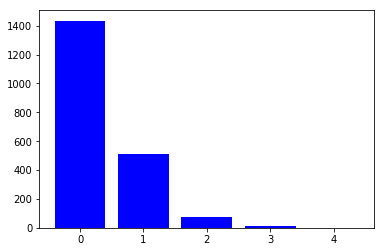

In [29]:
plt.bar(list(new_example.keys()), new_example.values(), color='b')
plt.show()

Это диаграмма функции g(m) для последовательности НРНРРНРРНН. 
х -число топологических контактов НН, у - число таких конформаций.


In [192]:
example_of_sequence = [0, 0, 0, 0, 0, 1, 1,1,1,1] 
new_example = get_g_m(example_of_sequence, conformations_10)
print(new_example)
print("finished") 

{0: 1461, 1: 573, 2: 0, 3: 0, 4: 0}
finished


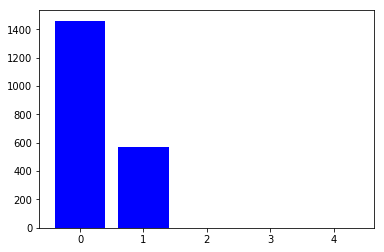

In [193]:
plt.bar(list(new_example.keys()), new_example.values(), color='b')
plt.show()

Это функция g(m) для последовательности PPPPPHHHHH. 
Диаграммы выглядят прям как в статье [1]

In [21]:
def partition_function(sequence,  e, conformations=[]):
    """Cтатистическая функция. Принимает последовательность и значение е<0 - значение энергии 
    взаимодействия между топологическими НН.
    Также принимает список конформаций длины данной цепочки, иначе сгенерирует его сама."""
    if(len(conformations)==0):
        conformations = get_all_conformations(len(sequence))
    degeneracy = get_g_m( sequence, conformations )
    s=max(degeneracy.keys())
    Z = 0 
    for m, g in degeneracy.items():
        Z=Z + g*exp((s-m)*e)
        
    return Z

In [22]:
a =partition_function([0, 0, 0, 0, 0, 0, 1,0,0,1] , -2, conformations_10)
print(a)

574.4459581034023


In [23]:
def mean_compactness(sequence,  e, conformations=[]):
    if(len(conformations)==0):
        conformations = get_all_conformations(len(sequence))
      
    
    n=len(sequence)
    m_1 = ceil(sqrt(n))
    m = floor(sqrt(n))
    if( n>m*m and m*m_1>=n ):
        t_max =n+1 - (4*m+2)/2
    elif (n>m*m_1 and n<=m_1*m_1):
        t_max = n+1 - (4*m+4)/2
    else:
        t_max =  n+1 - (4*m)/2
    
    t_max=int(t_max) 
    
    G_m = get_G_m_u(sequence, conformations)
    s= max(G_m.keys(), key=itemgetter(0) )[0]

    p=0
    for neighbors, g in G_m.items():
        p=p+(neighbors[0] +neighbors[1])/t_max*g * exp(( s - neighbors[0])*e)
    return p/partition_function( sequence,  e, conformations)

In [24]:
w = mean_compactness([0, 0, 0, 0, 0, 0, 1,0,0,1] , -1, conformations_10)
print(w)

0.34318715505185976


In [274]:
es = np.linspace(0, 8, 20)
example_of_sequence1 = [1, 0, 1, 0, 0, 1, 0,0,1,1] 
example_of_sequence2 =  [0, 0, 0, 0, 0, 0, 1,0,0,1] 
meancompactnesses1 = []
meancompactnesses2 = [] 
for i in es: 
    w = mean_compactness(example_of_sequence1, -i, conformations_10)
    meancompactnesses1.append(w)
    w1= mean_compactness(example_of_sequence2, -i, conformations_10)
    meancompactnesses2.append(w1)
print("finish")


finish


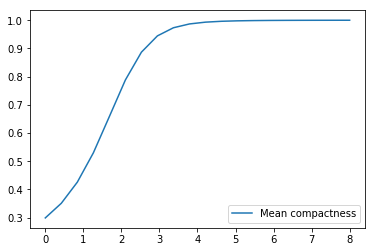

In [275]:
plt.plot(es, meancompactnesses1, '-', label = "Mean compactness")
plt.legend(loc='best')

По оси Х отложены -е. 
Это график зависимости средней компактности от значения энергии для последовательности НРНРРНРРНН. Такая последовательность может свернуться. 

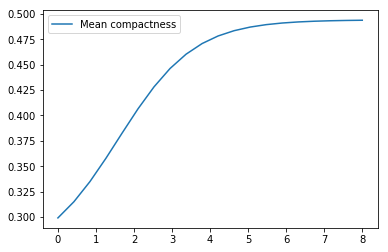

In [276]:
plt.plot(es, meancompactnesses2, '-', label = "Mean compactness")
plt.legend(loc='best')

Это график зависимости средней компактности от значения энергии для последовательности  PPPPPHHHHH. Такая последовательность не свернется. 

# Поиск радиуса вращения

Формулы брала в [3], источник возможно не самый топовый, но не нашла понятного для себя описания в [2]


In [28]:
def center_of_mass(conformation):
    """Функция для нахождения координат центра масс.
    Подразумевается, что все аминокислоты в молекуле одинаковой массы, а между ними ничего с массой нет.
    Принимает конформацию - список из координат, возвращает координаты в виде коортежа.
    """
    x=0
    y=0
    for i in range(len(conformation)):
        x=x+(conformation[i][0]-conformation[0][0])
        y=y+(conformation[i][1]-conformation[0][1])
        
    return (x/len(conformation), y/len(conformation)) 


In [29]:
def square_radius_of_gyration(conformation):
    """Функция возвращает радиус вращения для данной конформации """
    cent_mass=center_of_mass(conformation)
    summa=0
    for i in range(len(conformation)):
        dist = (conformation[i][0]-cent_mass[0],  conformation[i][1]-cent_mass[1])
        summa=summa+dist[0]*dist[0]+dist[1]*dist[1]
    return summa/len(conformation)
    
    

In [30]:
a=654
print(conformations_10[a])

q = center_of_mass(conformations_10[a])
print(q)
sq = square_radius_of_gyration( conformations_10[a]  )
print(sq)

[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 2), (3, 2)]
(2.3, 1.6)
2.8500000000000005


In [31]:

mean_square_r=0
for conf in conformations_10:
    mean_square_r = mean_square_r+square_radius_of_gyration(conf)

print(mean_square_r/len(conformations_10))

3.324434611602767


In [ ]:
for i in range(3, 11):
    c = get_all_conformations(i)
    number_of_conformations.append(len(c))
    print(i, " finished", end = " ")

# Все блуждания 

In [24]:
def get_all_saws(current_paths, length, current_conformation):
    """ Все созданные конформации лежат в первом аргументе функции get_all_saws, 
    поэтому первым аргументом нужно подавать переменную, которой ранее присвоили пустой список
    
    """
    if(length==1):
        current_paths.append(current_conformation)
    else:
        for step in [(1, 0), (-1, 0), (0, 1),  (0, -1)]:
            new_point = (current_conformation[-1][0]+step[0], current_conformation[-1][1]+step[1] )
            if new_point in current_conformation:
                continue
            else:
                temp_path = current_conformation.copy()
                temp_path.append(new_point)
                get_all_saws(current_paths, length-1,  temp_path)

In [25]:
start_conformation = [(0,0)]
saws_set =[]

get_all_saws(saws_set, 11,start_conformation)
print(len(saws_set))
print(saws_set[10])
print(16268/2034)
#34*8
print(2033*8+4)
print(44100/5513)
print(5512*8+4)

44100
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (8, 1), (8, 2)]
7.99803343166175
16268
7.999274442227462
44100


In [ ]:
#44100

# References

1) A Lattice Statistical Mechanics Model of the Conformational and Sequence Spaces of Proteins, Kit Fun Lau and Ken A. Dill, Macromolecules 1989 

2) Lattice Models of Polymers, Carlo Vanderzande, 2008

3) Polymer solutions, An Introduction to Physical Properties, IWAO TERAOKA